https://code.visualstudio.com/docs/datascience/data-science-tutorial

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
# need to change the question marks to np.nan and then the type
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

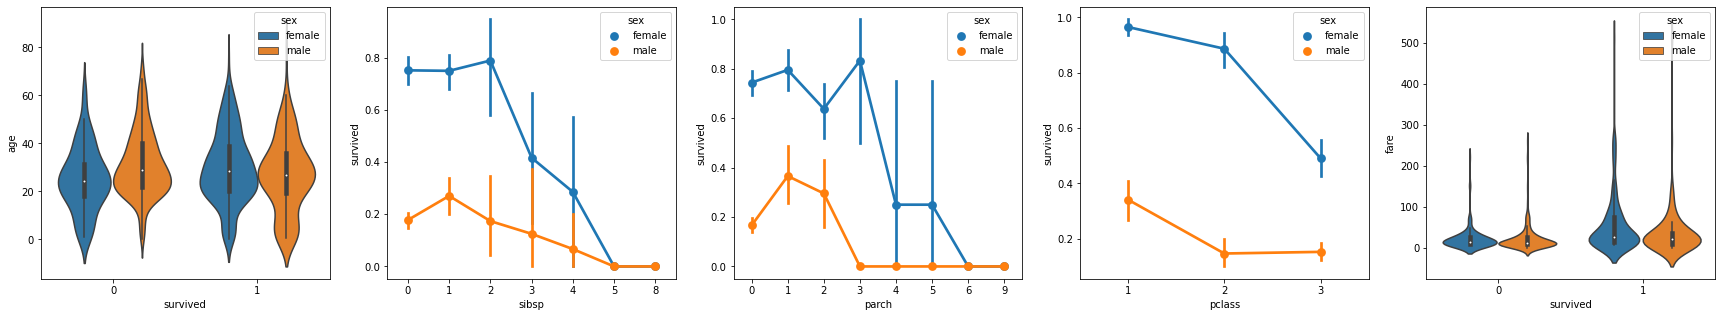

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
# I love seaborn 8)

In [6]:
# feature engineering at its best
data.replace({'male': 1, 'female': 0}, inplace=True)

In [7]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


So it looks like gender/sex is highly correlated while sibsp (siblings or spouse) and parch (parents or child
have a lower correlation. Let's create a new variable and column in the dataset called relatives and check the 
correlation again.

In [9]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


Let's drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values, to end up with a dataset that can be used for training a model as it looks like the number of relatives a person had may have a higher correlation for survival.

In [10]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

Let's test and run a model now.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Let's use the Naïve Bayes algorithm for this classification experiment.

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


 Look at that, the trained algorithm had a ~75% success rate at estimating survival.

Since we have some money to spend, let's use a neural network to increase accuracy.

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

Using TensorFlow backend.


In [17]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

2021-10-21 14:15:34.304856: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-21 14:15:34.305496: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 1s 835us/step - loss: 0.6923 - accuracy: 0.5945
Epoch 2/50
836/836 [==============================] - 0s 51us/step - loss: 0.6898 - accuracy: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 55us/step - loss: 0.6844 - accuracy: 0.5861
Epoch 4/50
836/836 [==============================] - 0s 52us/step - loss: 0.6739 - accuracy: 0.5861
Epoch 5/50
836/836 [==============================] - 0s 52us/step - loss: 0.6580 - accuracy: 0.5861
Epoch 6/50
836/836 [==============================] - 0s 54us/step - loss: 0.6369 - accuracy: 0.5861
Epoch 7/50
836/836 [==============================] - 0s 57us/step - loss: 0.6150 - accuracy: 0.5861
Epoch 8/50
836/836 [==============================] - 0s 53us/step - loss: 0.5964 - accuracy: 0.5861
Epoch 9/50
836/836 [==============================] - 0s 52us/step - loss: 0.5832 - accuracy: 0.5861
Epoch 10/50
836/836 [==============================] - 0s 51us/step - loss: 0.5746 - accur

In [22]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8086124401913876


Looks like the neural model was a little better than the Naïve Bayes classification algorithm.